¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart_orders = pd.read_csv('/datasets/instacart_orders.csv',sep =";")
df_products         = pd.read_csv('/datasets/products.csv',sep =";")
df_aisles           = pd.read_csv('/datasets/aisles.csv',sep =";")
df_departments      = pd.read_csv('/datasets/departments.csv',sep =";")
df_order_products   = pd.read_csv('/datasets/order_products.csv',sep =";")

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien usaste correctamente una celda independiente para importar las librerías y otra celda para leer los datos.
</div>

In [3]:
# mostrar información del DataFrame
df_instacart_orders.info()
df_instacart_orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [5]:
# mostrar información del DataFrame
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# mostrar información del DataFrame
df_order_products.info(show_counts =True)
df_order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, usaste correctamente los métodos de pandas para explorar los datos.
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

🔎df_instacart_orders : posee datos faltantes en la columna days_since_prior order, los cuales puede ser por que los clientes sólo han hecho un pedido. 

🔎df_products : tiene datos faltantes en la columna product_name

🔎df_aisles : no tiene datos faltantes

🔎df_departments : no tiene datos faltantes

🔎df_order_products : tiene valores faltantes de acuerdo a la fusión .info(show_counts =True) en la columna add_to_cart_order

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas conclusiones basadas en lo que se puede observar de los datos.
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

✔ESTOS PASOS SON LOS QUE UTILIZARE DE MANERA GENERAL EN CADA DATAFRAME PARA LOS VALORES DUPLICADOS

PRIMER PASO  UTILIZAR LA FUNCIÓN .duplicated() PARA SABER LOS VALORES DUPLICADOS 

SEGUNDO PASO UTILIZAR LA FUNCIÓN .drop_duplicates() PARA ELIMINAR LOS VALORES DUPLICADOS

TERCER PASO  UTILIZAR NUEVAMENTE LA FUNCIÓN .duplicated() PARA SABER LOS VALORES DUPLICADOS QUE DEBE DAR COMO RESULTADO CERO



✔ESTOS PASOS SON LOS QUE UTILIZARE DE MANERA GENERAL EN CADA DATAFRAME PARA LOS VALORES AUSENTES

PRIMER PASO  UTILIZAR LA FUNCIÓN .isna() PARA SABER LOS VALORES AUSENTES 

SEGUNDO PASO UTILIZAR LA FUNCIÓN .fillna() PARA CAMBIAR LOS VALORES AUSENTES

TERCER PASO  UTILIZAR NUEVAMENTE LA FUNCIÓN .isna() PARA SABER LOS VALORES AUSENTES QUE DEBE DAR COMO RESULTADO CERO



<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Falta escribir los pasos que seguiras para preprocesar los datos, no tiene que ser muy detallada con ideas simples de lo que se va a realizar es suficiente.
</div>

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print (f'Valores duplicados en instacart_orders: {df_instacart_orders.duplicated().sum()}')
df_instacart_orders[df_instacart_orders.duplicated()].head(15)

Valores duplicados en instacart_orders: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común? SÍ ESTAN DUPLICADAS Y TIENEN EN COMÚN QUE SE ORDENARON A LAS DOS AM (2) EL DIA MIERCOLES(3)

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
df_instacart_orders[(df_instacart_orders.order_dow == 3) & (df_instacart_orders.order_hour_of_day == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Identificaste correctamente los valores faltantes.
</div>

¿Qué sugiere este resultado? 

QUE PUEDE HABER UNA ERROR CON LA FUSIÓN .duplicated() Y NO NOS DA LOS 121 FILAS QUE EL ALGORITMO: df_instacart_orders[(df_instacart_orders.order_dow == 3) & (df_instacart_orders.order_hour_of_day == 2)] NOS DA

In [10]:
# Elimina los pedidos duplicados
df_instacart_orders = df_instacart_orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
print (f'Valores duplicados en instacart_orders: {df_instacart_orders.duplicated().sum()}')

Valores duplicados en instacart_orders: 0


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_id = df_instacart_orders.duplicated(subset= 'order_id').sum()
print (f'Valores duplicados en order_id: {order_id}')

Valores duplicados en order_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

LA FUSIÓN .duplicated() MOSTRO EN UN PRINCIPIO QUE SOLO HABIA 15 DATOS DUPLICADOS, 
CUANDO SE EMPLEO EL ALGORITMO DE df_instacart_orders[(df_instacart_orders.order_dow == 3) & (df_instacart_orders.order_hour_of_day == 2)] NOS DIO COMO RESULTADO 121 FILAS, 
AL FINAL SE ELIMNAROS ESOS DATOS DUPLICADOS con .drop_duplicates()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen manejo de estos valores duplicados.
</div>

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print (f'Valores duplicados en products: {df_products.duplicated().sum()}')

Valores duplicados en products: 0


In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
product_id = df_products.duplicated(subset= 'product_id').sum()
print (f'Valores duplicados en product_id: {product_id}')

Valores duplicados en product_id: 0


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
print (f'Valores duplicados en product_name: {df_products.duplicated(subset = "product_name").sum()}')
df_products[df_products.duplicated(subset = "product_name")]

Valores duplicados en product_name: 1361


,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
df_products[~(df_products["product_name"].isna()) & (df_products["product_name"].duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.

DE MANERA GENERAL SE REVISO SI EL DATAFRAME DE df_products TENIA DATOS DUPLICADOS LA RESPUESTA FUE 0
PERO AL REVISAR LA COLUMNA DE product_name NOS MOSTRO QUE HAY 1361 ESTO QUIERE DECIR QUE SI REVISAMOS DE MANERA PARTICULAR LAS COLUMNAS NOS PUEDE DAR DATOS DUPLICADOS


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen comentario, los valores duplicados por columna generalmente es por datos que se repiten pero en situaciones distintas.
</div>

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
department = df_departments.duplicated().sum()
print (f'Valores duplicados en departments: {department}')


Valores duplicados en departments: 0


In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
department_id = df_departments["department_id"].duplicated().sum()
print (f'Valores duplicados en department_id: {department_id}')


Valores duplicados en department_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

SE REVISO DE MANERA GENERAL df_departments SI TENIA DATOS DUPLICADOS NO LOS TENIA
SE REVISO LA COLUMNA DE department_id TAMPOCO TENIA DATOS DUPLICADOS

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print (f'Valores duplicados en aisles: {df_aisles.duplicated().sum()}')

Valores duplicados en aisles: 0


In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
aisle_id = df_aisles["aisle_id"].duplicated().sum()
print (f'Valores duplicados en aisle_id: {aisle_id}')


Valores duplicados en aisle_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

SE REVISO DE MANERA GENERAL df_aisles SI TENIA DATOS DUPLICADOS NO LOS TENIA

SE REVISO LA COLUMNA DE aisle_id TAMPOCO TENIA DATOS DUPLICADOS

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print (f'Valores duplicados en order_products: {df_order_products.duplicated().sum()}')

Valores duplicados en order_products: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_ids = df_order_products.duplicated(subset = ['order_id','product_id']).sum()
print (f'Valores duplicados en order_products_ids: {order_products_ids}')


Valores duplicados en order_products_ids: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

SE REVISO DE MANERA GENERAL df_order_products SI TENIA DATOS DUPLICADOS NO LOS TENIA

SE REVISO LA COLUMNAS DE order_id & product_id TAMPOCO TENIA DATOS DUPLICADOS

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Exploraste correctamente estos data frames.
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

product_name_nan = df_products["product_name"].isna().sum()
print (f'Valores ausentes en products_name: {product_name_nan}')
display(df_products[df_products["product_name"].isna()])

Valores ausentes en products_name: 1258


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

HEMOS DETERMINADO QUE HAY 1258 VALORES AUSENTES Y TIENEN UNA COUNCIDENCIA DE CON LAS COLUMNAS aisle_id = 100
Y department_id = 21


In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

product_nan_100 = df_products[(df_products['product_name'].isna()) & (~df_products['aisle_id'] == 100)].count()
print ((f'Cuantos product_name estan relacionados con el aisle_id = 100: {(product_nan_100)}'))
display(df_products[(df_products['product_name'].isna()) & (~df_products['aisle_id'] == 100)])

Cuantos product_name estan relacionados con el aisle_id = 100: product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

CON EL ALGORITMO: df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100)] CONDISIONAMOS QUE NOS MOSTRARA LOS NOMBRES DE LOS PRODUCTOS AUSENTES (NAN) Y QUE ESTEN RELACIONADOS CON EL PASILLO CON ID 100.

CON LA FUNSION .count() NOS CONTO LOS VALORES BOOLEANOS EN CADA COLUMNA Y EL RESULTADO FUE CERO
CON display MOSTRE LOS ENCABEZADOS DE LAS COLUMNAS


In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

department_nan_21 = df_products[(df_products['product_name'].isna()) & (~df_products['department_id'] == 21)].count()
print ((f'Cuantos product_name estan relacionados con el department_id = 21: {(department_nan_21)}'))
display(df_products[(df_products['product_name'].isna()) & (~df_products['aisle_id'] == 21)])

Cuantos product_name estan relacionados con el department_id = 21: product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


,product_id,product_name,aisle_id,department_id


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas observaciones con respecto al origen de los valores faltantes.
</div>

Describe brevemente cuáles son tus hallazgos.

CON EL ALGORITMO: df_products[(df_products['product_name'].isna()) & (~df_products['department_id'] == 21)] CONDISIONAMOS QUE NOS MOSTRARA LOS NOMBRES DE LOS PRODUCTOS AUSENTES (NAN) Y QUE ESTEN RELACIONADOS CON EL DEPARTAMENTO 21.

CON LA FUNSION .count() NOS CONTO LOS VALORES BOOLEANOS EN CADA COLUMNA Y EL RESULTADO FUE CERO CON display MOSTRE LOS ENCABEZADOS DE LAS COLUMNAS


In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

department_21 =df_departments[df_departments["department_id"]== 21]['department']
print (department_21)
print()
aisle_100 =df_aisles[df_aisles["aisle_id"]== 100]['aisle']
print (aisle_100)


20    missing
Name: department, dtype: object

99    missing
Name: aisle, dtype: object


Describe brevemente cuáles son tus hallazgos.

EL ALGORITMO EN GENERAL PARA AMBOS CASOS NOS MUESTRA
AL NOMBRE DEL DEPARMENTO 21 Y DEL PASILLO 100
Y EN AMBOS CASOS ES missing (desparecido)


In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products["product_name"] = df_products["product_name"].fillna('Unknown')
df_products.info()
df_products_Uk = df_products[df_products["product_name"]=="Unknown"]
display(df_products_Uk.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

SE BUSCO LOS VALORES AUSENTES CON LA FUCIÓN .isna() CON LO CUAL LLEGAMOS A LA CONCLUSIÓN QUE EN EL DATAFRAME DE df_products EN LAS COLUMNAS DE aisle_id == 100 y department_id == 21 SON EN DONDE SE ENCUENTRAN LOS VALORES AUSENTES.

POR LO CUAL SE VERIFICO DE FORMA GENERAL Y DE FORMA INDIVIDUAL (aisle_id == 100 y department_id == 21) Y AL FINAL SE CAMBIO LOS NaN POR Unknown CON LA FUNCIÓN .fillna()

    
</div>

Describe brevemente tus hallazgos y lo que hiciste con ellos.

SE BUSCO LOS VALORES AUSENTES CON LA FUCIÓN .isna() CON LO CUAL LLEGAMOS A LA CONCLUSIÓN QUE EN EL DATAFRAME DE df_products EN LAS COLUMNAS DE aisle_id == 100 y department_id == 21 SON EN DONDE SE ENCUENTRAN LOS VALORES AUSENTES.

POR LO CUAL SE VERIFICO DE FORMA GENERAL Y DE FORMA INDIVIDUAL (aisle_id == 100 y department_id == 21) Y AL FINAL SE CAMBIO LOS NaN POR Unknown CON LA FUNCIÓN .fillna()


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Falta incluir los hallazgos de esta sección.
</div>

### `orders` data frame

In [28]:
# Encuentra los valores ausentes

inst_orders_dspo= df_instacart_orders[df_instacart_orders["days_since_prior_order"].isna()]

display(inst_orders_dspo)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
inst_orders_first= df_instacart_orders[df_instacart_orders["days_since_prior_order"].isna()
                                       & (~df_instacart_orders["order_number"]==1)]
display(inst_orders_first)
display((inst_orders_first).count())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

YA QUE PARA LA 28817 CLIENTES FUE SU PRIMER PEDIDO POR LO TANTO NO TENEMOS DATOS EN LA COLUMNA days_since_prior_order QUE NOS INDIQUE CON ANTERIORIDAD ALGUNA COMPRA ANTERIOR


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
orders_prod_aco= df_order_products[df_order_products["add_to_cart_order"].isna()]
display(orders_prod_aco)
print(f'El total de valores ausentes en add_to_cart_order es:{len(orders_prod_aco)}')

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


El total de valores ausentes en add_to_cart_order es:836


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien los valores faltantes se encontraron correctamente.
</div>

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
orders_prod_aco_min= df_order_products["add_to_cart_order"].min()
orders_prod_aco_max= df_order_products["add_to_cart_order"].max()
print(f'El valor mínimo de los valores ausentes es:{orders_prod_aco_min}')
print()                                       
print(f'El valor mínimo de los valores ausentes es:{orders_prod_aco_max}')                                       

El valor mínimo de los valores ausentes es:1.0

El valor mínimo de los valores ausentes es:64.0


Describe brevemente cuáles son tus hallazgos.

LOS VALORES MINIMO Y MAXIMO SON LOS DIAS QUE PASAN PARA QUE NUEVAMENTE UN CLIENTE REALICE OTRA COMPRA


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
cart_miss_orderids =sorted(list(df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].unique()))
print(f'El total de valores ausentes en los pedidos es:{len(cart_miss_orderids)}')

El total de valores ausentes en los pedidos es:70


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_id_gp = df_order_products[df_order_products['order_id'].isin(cart_miss_orderids)].groupby('order_id')
order_id_gp_prd = order_id_gp['product_id'].count().min()
print(f'El valor mínimo de product_id es:{order_id_gp_prd}')

El valor mínimo de product_id es:65


Describe brevemente cuáles son tus hallazgos.
CON LA VARIABLE orders_prod_aco OBTUVE UN TOTAL DE 836 NaN QUE NO AÑADIERON NINGUNA ORDEN
ASI COMO OBTUVE EL MINIMO Y MAXIMO DE ORDEN SECUECIAL EN CUANTO A PEDIDOS
GRUPE CON LA VARIABLE cart_miss_orderids TODOS LOS PEDIDOS IDS(order_id) ASI COMO OBTUVE EL TOTAL DE LOS MISMOS
 

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_order_products["add_to_cart_order"] = df_order_products["add_to_cart_order"].fillna(999).astype('int')
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

DE LOS 836 NaN QUE TENIAMOS EN EL df_order_products['add_to_cart_order'] SE REEMPLAZO CON 999 Y SE CONVIERTO A ENTERO (int)


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena imputación de los datos faltantes.
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

COMO EN UN PRINCIPIO SE UTILIZARON LAS FUNCIONES PARA LOS DATOS DUPLICADOS (.duplicated() y .drop_duplicates())DE FORMA GENERAL Y DE CUARDO A LO QUE OBSERVAMOS EN EL RESULTADO LO REVISAMOS DE MANERA INDIVIDUAL

SE UTILIZARON LAS FUNCIONES PARA LOS DATOS AUSENTES (.isna() y .fillna())DE FORMA GENERAL Y DE CUARDO A LO QUE OBSERVAMOS EN EL RESULTADO LO REVISAMOS DE MANERA INDIVIDUAL



<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Faltan las conclusiones de esta sección.
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
hour_ofday = sorted(df_instacart_orders["order_hour_of_day"].unique())
print(hour_ofday)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [36]:
hour_dow = sorted(df_instacart_orders["order_dow"].unique())
print(hour_dow)

[0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones

COMO PODEMOS OBSERVAR EN AMBOS CASOS PARA 'order_hour_of_day' y 'order_dow' SUS VALORES SON RAZONABLES


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, obtuviste correctamente el listado de los valores.
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

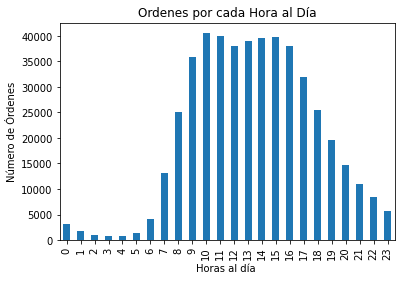

In [37]:
dayow_counts= df_instacart_orders["order_hour_of_day"].value_counts().sort_index()

dayow_counts.plot( kind   = "bar",
                   title  = "Ordenes por cada Hora al Día",
                   xlabel = "Horas al día ",
                   ylabel = "Número de Órdenes"

                    )

plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, la gráfica de barras es correcta para visualizar la distribución de las ordenes en las distintas horas del día.
</div>

Escribe aquí tus conclusiones

PODEMOS CONCLUIR CON LA GRAFICA QUE LAS HORAS DE MAYOR NÚMERO DE ORDENES POR HORA SON DE LAS 10:00 HRS A LAS 16:00 HRS


### [A3] ¿Qué día de la semana compran víveres las personas?

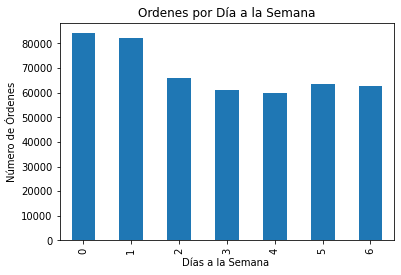

Días a la Semana : 0 = Sunday, 1 = Monday, 2= Tuesday, 3 = Wednesday, 4= Thursday, 5= Friday, 6= Saturday


In [38]:
dow_counts= df_instacart_orders["order_dow"].value_counts().sort_index()
week =  ["S","M","T","W","Th","F","S"]
dow_counts.plot( kind   = "bar",
                   title  = "Ordenes por Día a la Semana",
                   xlabel = "Días a la Semana ",
                   ylabel = "Número de Órdenes",
                   legend = False
            
               )

plt.show()
print("Días a la Semana : 0 = Sunday, 1 = Monday, 2= Tuesday, 3 = Wednesday, 4= Thursday, 5= Friday, 6= Saturday")


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

La gráfica es correcta, recuerda incluir una nota indicando que valor tiene cada número en el eje de día de la semana.
</div>

Escribe aquí tus conclusiones

GRACIAS A LA GRAFICA PODEMOS CONCLUIR QUE EL DÍA CON MAYOR NUMERO DE ORDENES ES EL DOMINGO Y DESPUES EL LUNES


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

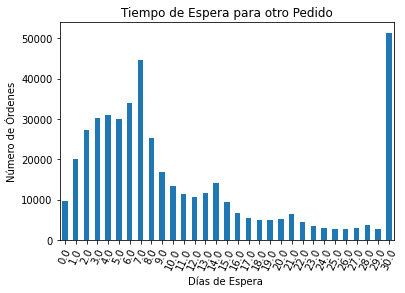

El valor mínimo que la gente espera para hacer otra orden es:2640 que pertenece al día 29

El valor máximo que la gente espera para hacer otra orden es:51337 que pertenece al día 30


In [39]:
dspo_counts= df_instacart_orders["days_since_prior_order"].value_counts().sort_index()

dspo_counts.plot( kind   = "bar",
                   title  = "Tiempo de Espera para otro Pedido",
                   xlabel = "Días de Espera ",
                   ylabel = "Número de Órdenes",
                    rot = 65
                    )

plt.show()

print(f'El valor mínimo que la gente espera para hacer otra orden es:{dspo_counts.min()} que pertenece al día 29')
print()
print(f'El valor máximo que la gente espera para hacer otra orden es:{dspo_counts.max()} que pertenece al día 30')

Escribe aquí tus conclusiones

EN CONCLUSÍON AL GRAFICAR LOS ALGORITMOS PODEMOS VER MEJOR EL RESULTADO QUE ESTAMOS BUSCANDO


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena visualización.
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
hod_wed= df_instacart_orders[df_instacart_orders["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index()
hod_sat= df_instacart_orders[df_instacart_orders["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
hod_ws = pd.concat([hod_wed,hod_sat],axis = 1) 
hod_ws.columns = ['Míercoles','Sábado']


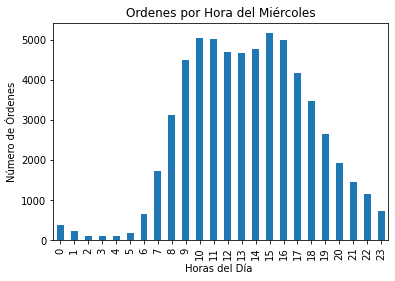

In [41]:
hod_wed.plot(      kind   = "bar",
                   title  = "Ordenes por Hora del Miércoles",
                   xlabel = "Horas del Día ",
                   ylabel = "Número de Órdenes"

                    )

plt.show()

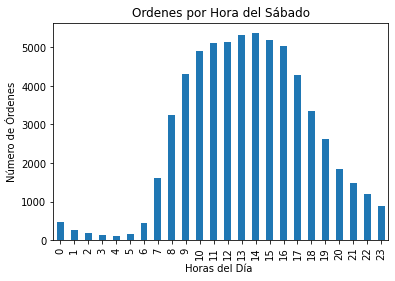

In [42]:
hod_sat.plot(      kind   = "bar",
                   title  = "Ordenes por Hora del Sábado",
                   xlabel = "Horas del Día ",
                   ylabel = "Número de Órdenes"

                    )

plt.show()

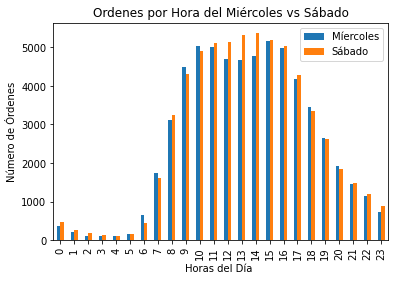

In [43]:
hod_ws.plot(       kind   = "bar",
                   title  = "Ordenes por Hora del Miércoles vs Sábado",
                   xlabel = "Horas del Día ",
                   ylabel = "Número de Órdenes"

                    )

plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Muy bien! Usaste colores distintos y colocaste ambas distribuciones en la misma gráfica para poder compararlas.
</div>

Escribe aquí tus conclusiones

ES MAS FACIL USAR LA FUNSIÓN concat.() PARA VER DE UNA FORMA MÁS FACIL LAS DIFERENCIAS ENTRE LAS DOS GRAFICAS Y LA FUSIÓN axis
NOS AYUDA PARA DARLE UNA MEJOR PRESENTACIÓN


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Debes realizar un agrupamiento por usuario y con esta tabla realizar un histograma con el método .hist() o la función hist de matplotlib.
    
```
orders.groupby('user_id')['order_id'].count().sort_values() 
```
</div>

In [44]:
num_order_total = df_instacart_orders.groupby('user_id')['order_id'].count().sort_values() 
print(num_order_total)

user_id
152331     1
139876     1
60408      1
139873     1
139871     1
          ..
66664     24
148162    24
78375     25
193164    26
149605    28
Name: order_id, Length: 157437, dtype: int64


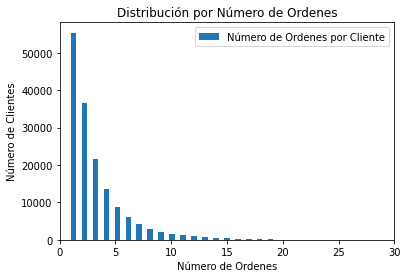

In [45]:
num_order_total.plot(      kind   = "hist",
                   title  = "Distribución por Número de Ordenes",
                   bins = 55
                    )
plt.xlim (0,30)
plt.xlabel ("Número de Ordenes")
plt.ylabel ("Número de Clientes")
plt.legend (["Número de Ordenes por Cliente"])

plt.show()

Escribe aquí tus conclusiones

DE ACUERDO AL HISTOGRAMA PODEMOS CONCLUIR QUE MÁS DE 50,000 CLIENTES HACEN POR LO MENOS UNA ORDEN Y ASI VA BAJANDO HASTA LLEGAR A 28 ORDENES POR CLIENTE.

SIENDO LOS MÁS ALTOS LAS CINCO PRIMERAS ORDENES POR CLIENTE


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, la distribución se muestra de manera correcta.
</div>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
best_prod = df_order_products.merge(df_products, on = 'product_id')


In [47]:
best20_prod = best_prod.groupby(["product_id","product_name"]).count().sort_values(["order_id"], ascending = False).reset_index()

In [48]:
display(best20_prod.head(20))

,product_id,product_name,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,24852,BANANA,66050,66050,66050,66050,66050
1,13176,BAG OF ORGANIC BANANAS,53297,53297,53297,53297,53297
2,21137,ORGANIC STRAWBERRIES,37039,37039,37039,37039,37039
3,21903,ORGANIC BABY SPINACH,33971,33971,33971,33971,33971
4,47209,ORGANIC HASS AVOCADO,29773,29773,29773,29773,29773
5,47766,ORGANIC AVOCADO,24689,24689,24689,24689,24689
6,47626,LARGE LEMON,21495,21495,21495,21495,21495
7,16797,STRAWBERRIES,20018,20018,20018,20018,20018
8,26209,LIMES,19690,19690,19690,19690,19690
9,27845,ORGANIC WHOLE MILK,19600,19600,19600,19600,19600


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, realizaste correctamente este enlistado de los productos más populares.
</div>

Escribe aquí tus conclusiones

EN EL PRIMER PROBLEMA BUSCAMOS LAS DIFERENCIAS EN CUANTO A ORDENES ENTRE LOS DIAS MIÉRCOLES Y SÁBADO SIENDO EL MÁS PRODUCTIVO EL SÁBADO.

EN EL SEGUNDO PROBLEMA SE HIZO UN HISTOGRAMA DEL NÚMERO DE ORDENES QUE HACE UN CLIENTE SIENDO EL MÁS ALTO LOS CLIENTES QUE SOLO REALIZAN UNA ORDEN CON MÁS DE 50,OOO CLIENTES EN TOTAL PARA UNA ORDEN Y ASI SUCESIVAMENTE HASTA LLEGAR A 28 ORDENES QUE LA REALIZO UN SOLO CLIENTE.

EN EL TERCER PROBLEMA SE HIZO UNA LISTA CON LOS 20 PRODUCTOS (product_id) QUE MAS ORDENAN LOS CLIENTES

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Faltan las conclusiones de esta sección, debe ser un comentario tomando en cuenta lo observado con estos análisis.
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Debes realizar un conteo por id de orden con group by.
    
```
order_products.groupby('order_id').count()['product_id']    
```
</div>

In [49]:
num_prod = df_order_products.groupby('order_id')['product_id'].count()
histogram_num_prod = num_prod.value_counts().sort_index()
print(histogram_num_prod)

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: product_id, Length: 90, dtype: int64


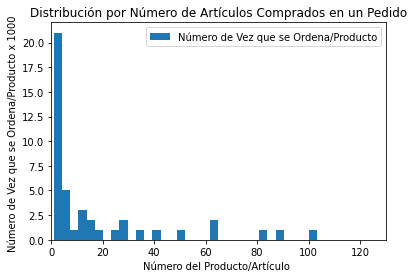

In [50]:
histogram_num_prod.plot(      kind   = "hist",
                   title  = "Distribución por Número de Artículos Comprados en un Pedido",
                   bins = 10000
                    )
plt.xlim (0,130)
plt.xlabel ("Número del Producto/Artículo ")
plt.ylabel ("Número de Vez que se Ordena/Producto x 1000 ")
plt.legend (["Número de Vez que se Ordena/Producto"])

plt.show()

Escribe aquí tus conclusiones

COMO PODEMOS OBSERVAR EN EL HISTOGRAMA LOS PRIMEROS 20 ARTICULOS SON LOS MÁS ORDENADOS POR LOS CLIENTES 
NO SE MUESTRAN LOS DEMAS ARTICULOS YA QUE NO TIENEN POR LO MENOS 1000 ORDENES

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Primero filtra las filas que se pidieron nuevamente (reorder) para esto guiate con la columna reordered y realiza un conteo por order id y toma los 20 más grandes con sort values.
    
```
order_products['reordered'] == 1 
```
</div>

In [51]:
produc_reord = df_order_products[df_order_products["reordered"]==1]


In [52]:
best_reord = produc_reord.merge(df_products, on = "product_id")
best20_reord = best_reord.groupby(['product_name','product_id']).count().sort_values(
    ["order_id"], ascending = False).reset_index()

In [53]:
display(best20_reord.head(20))


,product_name,product_id,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,BANANA,24852,55763,55763,55763,55763,55763
1,BAG OF ORGANIC BANANAS,13176,44450,44450,44450,44450,44450
2,ORGANIC STRAWBERRIES,21137,28639,28639,28639,28639,28639
3,ORGANIC BABY SPINACH,21903,26233,26233,26233,26233,26233
4,ORGANIC HASS AVOCADO,47209,23629,23629,23629,23629,23629
5,ORGANIC AVOCADO,47766,18743,18743,18743,18743,18743
6,ORGANIC WHOLE MILK,27845,16251,16251,16251,16251,16251
7,LARGE LEMON,47626,15044,15044,15044,15044,15044
8,ORGANIC RASPBERRIES,27966,14748,14748,14748,14748,14748
9,STRAWBERRIES,16797,13945,13945,13945,13945,13945


Escribe aquí tus conclusiones

COMO PODEMOS OBSERVAR LA FRECUENCIA CON LA QUE SE PIDEN LOS MISMO ARTICULOS CON MAYOR FRECUENCIA ES SIMILAR AL 7.7(B3) SALVO QUE SUMAMOS CON sum() LA COLUMNA DE reordered PARA OBTENER LOS ARTICULOS QUE MAS SE VUELVEN A ORDENAR


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Para cada producto debes obtener cuantas veces se pide por primera vez y cuantas es reorden guiandote con la columna reordered.  
```
order_products['reordered'] == 1 
```
</div>

In [54]:
num_reordered = df_order_products.merge(df_instacart_orders, on = "order_id")
mean_reordered= num_reordered.groupby("product_id")["reordered"].sum().sort_values(ascending=False).reset_index()



<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola! 

En el merge dejaste el mismo dataframe en la izquierda y en la derecha (df_order_products) esto hace que se realicé un merge que duplica los datos y consume toda la memoria, por eso sale el error del kernel. En cuanto cambies esto, podras realizar los conteos y gráficas necesarios.
```
num_reordered = df_order_products.merge(df_order_products, on = "order_id")
```
</div>


In [55]:
display(mean_reordered)

,product_id,reordered
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
...,...,...
45568,37593,0
45569,14775,0
45570,37596,0
45571,14774,0


Escribe aquí tus conclusiones






### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Debes obtener el promedio de veces que alguien pide un producto nuevamente usando la columna reordered.
</div>

In [56]:
num_reordered = df_order_products.merge(df_instacart_orders, on = "order_id")
mean_reordered= num_reordered.groupby("user_id")["reordered"].mean().sort_values(ascending=False).reset_index()
display(mean_reordered)

,user_id,reordered
0,137587,1.0
1,173474,1.0
2,13918,1.0
3,62300,1.0
4,62307,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


Escribe aquí tus conclusiones

EL DATAFRAME DE df_order_products SOLO NOS INDICA SI EL CLIENTE YA HABIA PEDIDO EL ARTICULO ANTES QUE ES 1 Y 0 SI NO LO HA PEDIDO
POR LO TANTO AL PRINCIPIO SOLO NOS APRECEN LOS USUARIOS QUE HAN PEDIDO EL ARTICULO ANTES YA QUE NO NOS IDICA CUANTAS VECES LOS HA HECHO


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?



<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Usa la columna ['add_to_cart_order'] == 1 cuando vale 1 es porque el producto se incluyo primero en el carrito.
</div>

In [57]:
best_addcart = df_order_products.merge(df_products, on = "product_id")
best20_addcart = best_addcart.groupby(["product_name","product_id"]).sum().sort_values(["add_to_cart_order"], 
                                                                                       ascending = False).reset_index()


In [58]:
display(best20_addcart.head(20))

,product_name,product_id,order_id,add_to_cart_order,reordered,aisle_id,department_id
0,BANANA,24852,112844482127,325958,55763,1585200,264200
1,BAG OF ORGANIC BANANAS,13176,91038151403,273772,44450,1279128,213188
2,ORGANIC STRAWBERRIES,21137,63303826573,272490,28639,888936,148156
3,ORGANIC BABY SPINACH,21903,57975138946,255233,26233,4178433,135884
4,ORGANIC HASS AVOCADO,47209,50945663897,202976,23629,714552,119092
5,LIMES,26209,33709449495,171863,13327,472560,78760
6,LARGE LEMON,47626,36711458387,171731,15044,515880,85980
7,ORGANIC AVOCADO,47766,42131651438,160678,18743,592536,98756
8,STRAWBERRIES,16797,34285003358,142624,13945,480432,80072
9,ORGANIC RASPBERRIES,27966,32719499860,141043,14748,2361231,76788


Escribe aquí tus conclusiones

LLEGUE A LA MISMO CONCLUCIÓN QUE UTILIZANDO EL ['add_to_cart_order'] == 1, PERO EN ESTE CASO UTILICE LA función sum() PARA SUMAR LA COLUMAN add_to_cart_order.


### Conclusion general del proyecto:

EN GENERAL ES UNA BUENA PRACTICA PARA APRENDER SOBRE LA MANIPULACIÓN DE VARIOS DATAFRAME Y HACER CON ELLOS LA MANIPULACIÓN DE DATOS NECESARIOS PARA LAS DIFERENTES PREGUNTAS QUE NOS PODAMOS PLANTEAR EL CLIENTE.
COMO AQUI EN ADELANTE SE COMIENZA LLAMANDO A LOS FUCIÓNES QUE SE UTILIZARAN pandas, matplotlib.pyplot y numpy EN EL CASO DE numpy NO SE USO.
BUSCAMOS LOS VALORES AUSENTES Y VALORES DUPLICADOS EN CADA UNO DE LOS DATAFRAME EN FORMA GENERAL Y EN FORMA PARTICULAR.
AL TERMINAR EL PROCESAMIENTO DE LOS DATOS INICIAMOS CON:
TUVIMOS TRES TIPOS DE ANALISIS DE DATOS:

LOS FACILES 

LOS INTERMEDIOS

LOS DIFICILES

EN LO PARTICULAR PARA MI TODOS FUERON DIFICILES YA QUE CIERTAMENTE TARDE BASTANTE EN CADA UNO.


NOTA PERSONAL A MARCO TORRES:

MUCHAS GRACIAS POR LA OBSERVACIÓN:

num_reordered = df_order_products.merge(df_order_products, on = "order_id")

CON ESO PUDE TRABAJAR MEJOR


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Faltan conclusiones generales, recuerda que debe incluir un resumen de todo lo observado en el proyecto.
</div>


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola!
    
La primer parte de tu proyecto está bastante bien, en cuanto termines la parte final podré concluir con tu evaluación. Mucho éxito.
</div>


<div class="alert alert-block alert-danger">
<b>Segunda iteración.</b> <a class="tocSkip"></a>

¡Hola! 

En el merge dejaste el mismo dataframe en la izquierda y en la derecha (df_order_products) esto hace que se realicé un merge que duplica los datos y consume toda la memoria, por eso sale el error del kernel. En cuanto cambies esto, podras realizar los conteos y gráficas necesarios.
```
num_reordered = df_order_products.merge(df_order_products, on = "order_id")
```
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola!
    
Gracias por atender a los comentarios, puedo aprobar tu proyecto.
    
Saludos.
</div>